In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from pandas.core.frame import DataFrame
from sklearn.model_selection import train_test_split
import random

In [2]:
path = ('/Users/njxwq/Desktop/ipynb/big_data/measurement_data')  #path of the data

In [3]:
def get_folders(path):     #read all the folders in the path
    folders =os.listdir(path)
    folders.sort()
    list= []
    for folder in folders:
        if not  os.path.isdir(path +folder):        
            f_name = str(folder)
            tr = '/'   
            filename = path + tr + f_name
            if len(f_name) == 10:
                list.append(filename) 
    return list

In [4]:
def get_files(path):   #read all the files in one folder, store the features data and label data separately
    files =os.listdir(path)
    files.sort()
    list= []
    list1 = []
    for file in files:
        if not  os.path.isdir(path +file):        
            f_name = str(file)
            tr = '/'   
            filename = path + tr + f_name
            name, typename = filename.split('.')
            if typename == 'csv':
                if len(f_name) == 13:
                    list.append(filename)
                else:
                    list1.append(filename)
    return list,list1

In [5]:
list_folder = get_folders(path)  

In [6]:
def transform_new(data): #transform the input data to suitable form. 
    if len(data.columns) == 1:
        data = data.iloc[:,0].str.split(';', expand = True)
        data.columns = ['hour', 'minute', 'second', 'microsecond', 'hori_acc', 'ver_acc']
        data[['hour', 'minute','second',  'microsecond', 'hori_acc', 'ver_acc']] = data[['hour', 'minute','second', 'microsecond', 'hori_acc', 'ver_acc']].astype(float)
        data['datatime'] = data['hour'] + data['minute']/60 + data['second']/3600
        data.drop('hour', axis = 1, inplace = True)
        data.drop('minute', axis = 1, inplace = True)
        data.drop('second', axis = 1, inplace = True)
        data.drop('microsecond', axis = 1, inplace = True)

        data.insert(0, 'datatime', data.pop('datatime'))
    else:
        data.columns = ['hour', 'minute', 'second', 'microsecond', 'hori_acc', 'ver_acc']
        data[['hour', 'minute','second',  'microsecond', 'hori_acc', 'ver_acc']] = data[['hour', 'minute','second', 'microsecond', 'hori_acc', 'ver_acc']].astype(float)
        data['datatime'] = data['hour'] + data['minute']/60 + data['second']/3600
        data.drop('hour', axis = 1, inplace = True)
        data.drop('minute', axis = 1, inplace = True)
        data.drop('second', axis = 1, inplace = True)
        data.drop('microsecond', axis = 1, inplace = True)
    return data

In [7]:
def min_max_var_catch(list):  #collect the min, max and variance value of features hori_acc and ver_acc
    list_min_hori = []
    list_max_hori = []
    list_min_ver = []
    list_max_ver = []
    list_var_hori = []
    list_var_ver = []
    for file in list:
        df1 = pd.read_csv(file)
        df = transform_new(df1)
        list_max_hori.append(np.max(df['hori_acc']))
        list_max_ver.append(np.max(df['ver_acc']))
        list_min_hori.append(np.min(df['hori_acc']))
        list_min_ver.append(np.min(df['ver_acc']))
        list_var_hori.append(np.var(df['hori_acc']))
        list_var_ver.append(np.var(df['ver_acc']))
    return list_max_hori,list_max_ver,list_min_hori,list_min_ver,list_var_hori,list_var_ver

In [8]:
list_df = []  #create a list to store the transformed dataframe

In [9]:
for path1 in list_folder:  #from all the data files transform dataframe and store it in the pre-defined list
    list_file, list_label = get_files(path1)
    list_max_hori, list_max_ver, list_min_hori, list_min_ver, list_var_hori, list_var_ver = min_max_var_catch(list_file)
    dict1 = {'max_hori': list_max_hori, 
             'max_ver': list_max_ver, 
             'min_hori': list_min_hori,
             'min_ver': list_min_ver,
             'var_hori': list_var_hori,
             'var_ver':list_var_ver}
    df = DataFrame(dict1)
    df2 = pd.read_csv(list_label[0])
    df['state'] = df2['state']
    df['file'] = df2['file']
    df.insert(0, 'file', df.pop('file'))
    list_df.append(df)

In [10]:
df = list_df[0] #combine all the dataframes and use only one dataframe to represent all the data.
for i in range(1, len(list_df)):
    df = pd.concat([df, list_df[i]], ignore_index = True)

In [11]:
df  #check the new dataframe which will be used in classfication

,file,max_hori,max_ver,min_hori,min_ver,var_hori,var_ver,state
0,acc_00001.csv,1.373,1.658,-1.511,-2.045,0.162646,0.206963,0
1,acc_00002.csv,1.299,1.537,-1.446,-1.685,0.152569,0.210466,0
2,acc_00003.csv,1.313,2.161,-1.505,-1.872,0.153525,0.241473,0
3,acc_00004.csv,1.508,1.637,-1.476,-2.033,0.172871,0.225352,0
4,acc_00005.csv,1.334,1.967,-1.225,-1.690,0.149533,0.261756,0
...,...,...,...,...,...,...,...,...
13020,acc_00430.csv,4.004,12.851,-6.815,-6.985,1.466502,3.235708,2
13021,acc_00431.csv,3.762,12.570,-6.387,-8.043,1.389952,3.300033,2
13022,acc_00432.csv,4.365,11.900,-6.003,-7.761,1.451063,3.535872,2
13023,acc_00433.csv,4.022,14.616,-6.062,-8.082,1.574335,4.240760,2


In [12]:
df1 = pd.read_csv('the_whole_data.csv')  #read the previous transformed data(mean and mid value)

In [13]:
df1 = df1[[ 'mean_hori', 'mean_ver', 'median_hori', 'median_ver', 'state']]

In [14]:
df1

,mean_hori,mean_ver,median_hori,median_ver,state
0,0.006363,0.001671,0.003,0.014,0
1,-0.009000,0.006691,-0.013,0.012,0
2,-0.006220,-0.008295,-0.011,0.005,0
3,-0.005819,-0.001751,0.002,0.009,0
4,-0.002016,0.006631,-0.009,0.002,0
...,...,...,...,...,...
13020,-0.039199,0.003162,0.008,-0.008,2
13021,-0.029962,-0.002062,0.022,-0.023,2
13022,-0.056482,0.050883,-0.036,-0.032,2
13023,0.013096,0.028659,0.059,-0.050,2


In [15]:
df1[['max_hori','max_ver', 'min_hori', 'min_ver', 'var_hori', 'var_ver']] = df[['max_hori','max_ver', 'min_hori', 'min_ver', 'var_hori', 'var_ver']]

In [16]:
df1 #connect these two dataframes, df1 is the final dataframe which should be used in training.

,mean_hori,mean_ver,median_hori,median_ver,state,max_hori,max_ver,min_hori,min_ver,var_hori,var_ver
0,0.006363,0.001671,0.003,0.014,0,1.373,1.658,-1.511,-2.045,0.162646,0.206963
1,-0.009000,0.006691,-0.013,0.012,0,1.299,1.537,-1.446,-1.685,0.152569,0.210466
2,-0.006220,-0.008295,-0.011,0.005,0,1.313,2.161,-1.505,-1.872,0.153525,0.241473
3,-0.005819,-0.001751,0.002,0.009,0,1.508,1.637,-1.476,-2.033,0.172871,0.225352
4,-0.002016,0.006631,-0.009,0.002,0,1.334,1.967,-1.225,-1.690,0.149533,0.261756
...,...,...,...,...,...,...,...,...,...,...,...
13020,-0.039199,0.003162,0.008,-0.008,2,4.004,12.851,-6.815,-6.985,1.466502,3.235708
13021,-0.029962,-0.002062,0.022,-0.023,2,3.762,12.570,-6.387,-8.043,1.389952,3.300033
13022,-0.056482,0.050883,-0.036,-0.032,2,4.365,11.900,-6.003,-7.761,1.451063,3.535872
13023,0.013096,0.028659,0.059,-0.050,2,4.022,14.616,-6.062,-8.082,1.574335,4.240760


In [17]:
X = df1[['mean_hori', 'mean_ver', 'median_hori', 'median_ver',   
         'max_hori','max_ver', 'min_hori', 'min_ver', 'var_hori', 'var_ver']]   #define feature_data
Y = df1['state']

In [18]:
X

,mean_hori,mean_ver,median_hori,median_ver,max_hori,max_ver,min_hori,min_ver,var_hori,var_ver
0,0.006363,0.001671,0.003,0.014,1.373,1.658,-1.511,-2.045,0.162646,0.206963
1,-0.009000,0.006691,-0.013,0.012,1.299,1.537,-1.446,-1.685,0.152569,0.210466
2,-0.006220,-0.008295,-0.011,0.005,1.313,2.161,-1.505,-1.872,0.153525,0.241473
3,-0.005819,-0.001751,0.002,0.009,1.508,1.637,-1.476,-2.033,0.172871,0.225352
4,-0.002016,0.006631,-0.009,0.002,1.334,1.967,-1.225,-1.690,0.149533,0.261756
...,...,...,...,...,...,...,...,...,...,...
13020,-0.039199,0.003162,0.008,-0.008,4.004,12.851,-6.815,-6.985,1.466502,3.235708
13021,-0.029962,-0.002062,0.022,-0.023,3.762,12.570,-6.387,-8.043,1.389952,3.300033
13022,-0.056482,0.050883,-0.036,-0.032,4.365,11.900,-6.003,-7.761,1.451063,3.535872
13023,0.013096,0.028659,0.059,-0.050,4.022,14.616,-6.062,-8.082,1.574335,4.240760


In [19]:
Y.value_counts() #now there exists 3 labels, check for it.

1    9116
0    1959
2    1950
Name: state, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2, shuffle = True) #split data

In [21]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC  
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, BatchNormalization,Dropout
from tensorflow.keras.models import Model, Sequential

In [22]:
def hyperparameter_svm(parameters):  #use gridsearch to find the optimal hyperparameters of svm model
    svc = svm.SVC()
    model = GridSearchCV(svc,parameters,cv=5,scoring='accuracy')
    model.fit(X_train,y_train)
    test_score = model.score(X_test,y_test)
    train_score = model.score(X_train,y_train)
    print('train_score', train_score, '\n', 'test_score', test_score)
    return model.best_params_

In [23]:
parameters={'kernel':['rbf','sigmoid','linear','poly']} #find optimal hyperparameter 'kernel'
best_params_svm = hyperparameter_svm(parameters)

train_score 0.7181381957773513 
 test_score 0.7355086372360845


In [24]:
parameters={'kernel':[best_params_svm['kernel']], 'gamma':np.linspace(1,100,10)} #find optimal parameter 'gamma'
best_params_svm = hyperparameter_svm(parameters)

train_score 0.787236084452975 
 test_score 0.7900191938579655


In [25]:
parameters={'kernel':[best_params_svm['kernel']], 'gamma':[best_params_svm['gamma']], 'C':np.linspace(0.1,20,10)}
#find optimal hyperparameter 'C'
best_params_svm = hyperparameter_svm(parameters)

train_score 0.8059500959692898 
 test_score 0.8030710172744722


In [26]:
def svm_scores(best_params):  #print the result of the optimized model
    C = best_params['C']
    gamma = best_params['gamma']
    kernel = best_params['kernel']
    clf = svm.SVC(C = C, gamma = gamma, kernel = kernel)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    Confusion_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(Confusion_matrix,annot=True)
    print("accuracy:",  acc)

accuracy: 0.8030710172744722


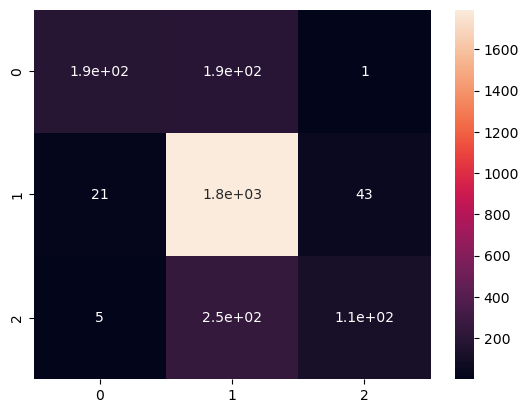

In [27]:
svm_scores(best_params_svm) #print svm accuracy and confusion metric
#this algorithm used to classify other label data as label '1', because the '1' data is much more than others.

In [28]:
def hyperparameter_rf(parameters): #use gridsearch to find the optimal hyperparameters of rf model
    rfc = RandomForestClassifier()
    model1 = GridSearchCV(rfc,parameters,cv = 5, scoring='accuracy')
    model1.fit(X_train,y_train)
    test_score = model1.score(X_test,y_test)
    train_score = model1.score(X_train,y_train)
    print('train_score', train_score, '\n', 'test_score', test_score)
    return model1.best_params_

In [29]:
parameters  = {'n_estimators': range(1,101,10)} #find optimal 'n_estimators', but there exists overfitting
best_params_rf = hyperparameter_rf(parameters)

train_score 1.0 
 test_score 0.8479846449136277


In [30]:
parameters  = {'n_estimators': [best_params_rf['n_estimators']], 'min_samples_leaf': range(1,51,10)}
#because of overfitting, optimize 'min_samples_leaf' to reduce overfitting.
best_params_rf = hyperparameter_rf(parameters)

train_score 1.0 
 test_score 0.8472168905950096


In [31]:
parameters  = {'n_estimators': [best_params_rf['n_estimators']], 
               'min_samples_leaf': [best_params_rf['min_samples_leaf']],
               'max_depth': range(1,21,1)}
#find optimal hyperparameter 'max_depth'
best_params_rf = hyperparameter_rf(parameters)

train_score 0.956429942418426 
 test_score 0.8514395393474088


In [32]:
parameters  = {'n_estimators': [best_params_rf['n_estimators']], 
               'min_samples_leaf': [best_params_rf['min_samples_leaf']],
               'max_depth': [best_params_rf['max_depth']],
              'min_samples_split': range(2,21,1)}
#find optimal hyperparameter 'min_samples_split'
best_params_rf = hyperparameter_rf(parameters)

train_score 0.9563339731285988 
 test_score 0.8479846449136277


In [33]:
parameters  = {'n_estimators': [best_params_rf['n_estimators']], 
               'min_samples_leaf': [best_params_rf['min_samples_leaf']],
               'max_depth': [best_params_rf['max_depth']],
              'min_samples_split': [best_params_rf['min_samples_split']],
              'max_features': range(5,21,1)}
#find optimal hyperparameter 'max_features'
best_params_rf = hyperparameter_rf(parameters)

train_score 0.9673704414587332 
 test_score 0.8452975047984644


After consider all the possible parameters which has influence on the generative ability, the model still has a little overfitting, it's better to preprocess the whole dataset to avoid overfitting.

In [34]:
def rfc_scores(best_params): #print the result of the optimized model
    n_estimators = best_params['n_estimators']
    min_samples_leaf = best_params['min_samples_leaf']
    max_depth = best_params['max_depth']
    min_samples_split = best_params['min_samples_split']
    max_features = best_params['max_features']
    rfc = RandomForestClassifier(n_estimators = n_estimators,min_samples_leaf = min_samples_leaf,
                                max_depth = max_depth, min_samples_split = min_samples_split,
                                max_features = max_features)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    Confusion_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(Confusion_matrix,annot=True)
    print("accuracy:",  acc)

accuracy: 0.8514395393474088


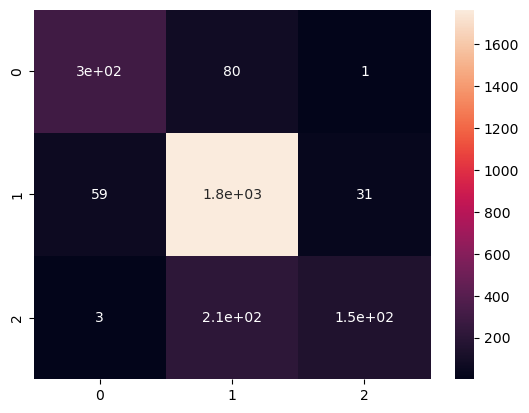

In [35]:
rfc_scores(best_params_rf) #randomforest accuracy and confusion metric

In [36]:
def hyperparameter_gbc(parameters): #use gridsearch to find the optimal hyperparameters of gbc model
    gbc = GradientBoostingClassifier()
    model = GridSearchCV(gbc,parameters,cv=5,scoring='accuracy')
    model.fit(X_train,y_train)
    test_score = model.score(X_test,y_test)
    train_score = model.score(X_train,y_train)
    print('train_score', train_score, '\n', 'test_score', test_score)
    return model.best_params_

In [37]:
parameters = {'learning_rate':[0.01, 0.1], 'n_estimators': range(1,101,10)} #find optimal 'learning_rate' and 'n_estimators'
best_params_gbc = hyperparameter_gbc(parameters)

train_score 0.8378119001919386 
 test_score 0.8326295585412667


In [38]:
parameters = {'learning_rate':[best_params_gbc['learning_rate']], 
              'n_estimators': [best_params_gbc['n_estimators']],
              'min_samples_leaf': range(1,51,10)}  #find optimal hyperparamter 'min_samples_leaf'
best_params_gbc = hyperparameter_gbc(parameters)

train_score 0.8357965451055662 
 test_score 0.8333973128598848


In [39]:
def gbc_scores(best_params):  #print the result of the optimized gbc model
    n_estimators = best_params['n_estimators']
    learning_rate = best_params['learning_rate']
    min_samples_leaf = best_params['min_samples_leaf']
    gbc = GradientBoostingClassifier(n_estimators = n_estimators, learning_rate = learning_rate, 
                                     min_samples_leaf = min_samples_leaf)
    gbc.fit(X_train, y_train)
    y_pred = gbc.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    Confusion_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(Confusion_matrix,annot=True)
    print("accuracy:",  acc)

accuracy: 0.8322456813819578


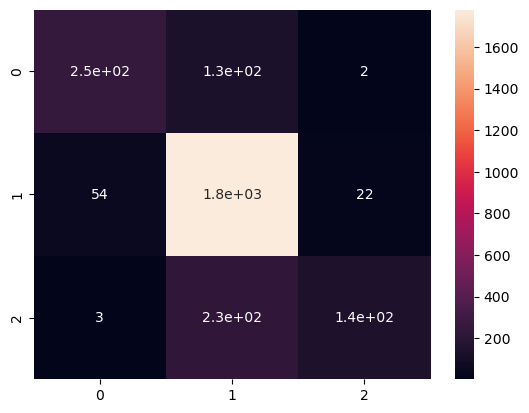

In [40]:
gbc_scores(best_params_gbc) #gbc accuracy and confusion metric

In [45]:
def nn_model(X_train, y_train, X_test, y_test): #define the structure of nn model using keras model
    input_shape = X_train.shape[1]
    input = Input(shape = (input_shape, ))
    x = Dense(1024, activation = 'relu')(input)
    x = Dense(512, activation = 'relu')(x)
    x = Dense(256, activation = 'relu')(x)
    x = Dense(32, activation = 'relu')(x)
    x = Dense(16, activation = 'relu')(x)
    x = Dense(8, activation = 'tanh')(x)
    output = Dense(3, activation = 'softmax')(x)
    
    nn = Model(input,output)
    nn.compile(optimizer = tf.keras.optimizers.Adam(lr = 1e-3), 
               loss= 'sparse_categorical_crossentropy', metrics = ['acc'])
    nn.fit(X_train, y_train, epochs = 30, batch_size = 24, shuffle =True,validation_data = (X_test, y_test))
    return nn

In [46]:
nn = nn_model(X_train, y_train, X_test, y_test) #training the model

Epoch 1/30


/Users/njxwq/miniforge3/envs/ms01/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


  7/435 [..............................] - ETA: 3s - loss: 1.0147 - acc: 0.5893  

2023-02-15 15:43:02.767085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


435/435 [==============================] - ETA: 0s - loss: 0.8058 - acc: 0.6956

2023-02-15 15:43:06.336873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


435/435 [==============================] - 4s 9ms/step - loss: 0.8058 - acc: 0.6956 - val_loss: 0.7424 - val_acc: 0.7125
Epoch 2/30
435/435 [==============================] - 4s 8ms/step - loss: 0.7544 - acc: 0.6999 - val_loss: 0.6845 - val_acc: 0.7290
Epoch 3/30
435/435 [==============================] - 4s 8ms/step - loss: 0.7085 - acc: 0.7177 - val_loss: 0.6740 - val_acc: 0.7424
Epoch 4/30
435/435 [==============================] - 4s 8ms/step - loss: 0.6534 - acc: 0.7413 - val_loss: 0.7179 - val_acc: 0.7693
Epoch 5/30
435/435 [==============================] - 4s 8ms/step - loss: 0.6228 - acc: 0.7608 - val_loss: 0.5725 - val_acc: 0.7846
Epoch 6/30
435/435 [==============================] - 4s 8ms/step - loss: 0.6229 - acc: 0.7535 - val_loss: 0.5700 - val_acc: 0.7862
Epoch 7/30
435/435 [==============================] - 4s 8ms/step - loss: 0.6011 - acc: 0.7670 - val_loss: 0.5374 - val_acc: 0.7912
Epoch 8/30
435/435 [==============================] - 4s 8ms/step - loss: 0.5864 - acc:

In [47]:
def nn_scores(nn):  #print the result of the optimized nn model
    y_pred = nn.predict(X_test)
    y_pred = np.argmax(y_pred, axis = 1)
    acc = metrics.accuracy_score(y_test, y_pred)
    Confusion_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(Confusion_matrix,annot=True)
    print("accuracy:",  acc)

71/82 [========================>.....] - ETA: 0s

2023-02-15 15:44:52.447429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


82/82 [==============================] - 0s 2ms/step
accuracy: 0.8030710172744722


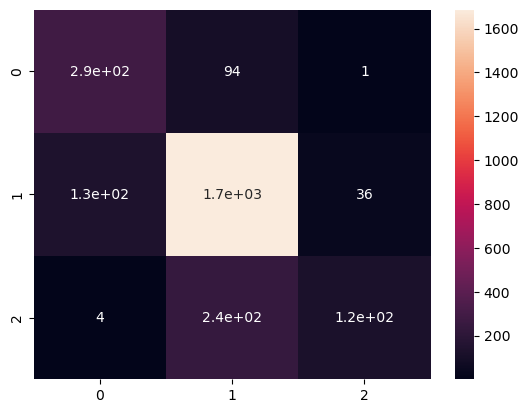

In [48]:
nn_scores(nn) #neuron network accuracy and confusion metric

When the number label is 3(0,1,2) now, it will be more hard for classifier to predict data correctly.
The accuracy of many classifiers is only about 81%, except randomforest classifier.
Randomforest classifier performs much better than other algorithms.
In order to deal with this problem and improve the accuracy of classifiers, more training data should be added and balanced. Or more features of data should be considered.